In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from typing import Tuple, Dict, Any, List
from datetime import datetime
import os
import itertools
import pandas as pd

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Configure matplotlib for better plots
plt.style.use('default')
sns.set_palette("husl")

Comprehensive Exploratory Data Analysis for Fashion-MNIST

In [13]:
from collections import Counter
class FashionMNISTEDA:

    def __init__(self):
        self.class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None

    def load_data(self):
        """Load Fashion-MNIST dataset"""
        print("\n" + "="*80)
        print("LOADING FASHION-MNIST DATASET")
        print("="*80)

        (self.x_train, self.y_train), (self.x_test, self.y_test) = keras.datasets.fashion_mnist.load_data()
        print(f"  Training samples: {len(self.x_train)}")
        print(f"  Test samples: {len(self.x_test)}")

        return self.x_train, self.y_train, self.x_test, self.y_test

    def dataset_overview(self):
        """Display basic dataset information"""
        print("\n" + "="*80)
        print("1. DATASET OVERVIEW")
        print("="*80)

        print("\n📊 Dataset Dimensions:")
        print(f"  Training set shape: {self.x_train.shape}")
        print(f"  Training labels shape: {self.y_train.shape}")
        print(f"  Test set shape: {self.x_test.shape}")
        print(f"  Test labels shape: {self.y_test.shape}")

        print("\n📋 Data Types:")
        print(f"  Images dtype: {self.x_train.dtype}")
        print(f"  Labels dtype: {self.y_train.dtype}")

        print("\n🎯 Classes:")
        print(f"  Number of classes: {len(self.class_names)}")
        print(f"  Class names: {self.class_names}")

        print("\n💾 Memory Usage:")
        train_size_mb = self.x_train.nbytes / (1024 * 1024)
        test_size_mb = self.x_test.nbytes / (1024 * 1024)
        total_size_mb = train_size_mb + test_size_mb
        print(f"  Training set: {train_size_mb:.2f} MB")
        print(f"  Test set: {test_size_mb:.2f} MB")
        print(f"  Total: {total_size_mb:.2f} MB")

    def analyze_pixel_values(self):
        """Analyze pixel value distributions"""
        print("\n" + "="*80)
        print("2. PIXEL VALUE ANALYSIS")
        print("="*80)

        print("\n📈 Pixel Value Statistics (Training Set):")
        print(f"  Min value: {self.x_train.min()}")
        print(f"  Max value: {self.x_train.max()}")
        print(f"  Mean value: {self.x_train.mean():.2f}")
        print(f"  Median value: {np.median(self.x_train):.2f}")
        print(f"  Std deviation: {self.x_train.std():.2f}")

        print("\n📊 Value Range:")
        print(f"  Range: [{self.x_train.min()}, {self.x_train.max()}]")
        print(f"  Data type: {self.x_train.dtype}")
        print(f"  Requires normalization: {'Yes (0-255 range)' if self.x_train.max() > 1 else 'No'}")

        # Plot pixel distribution
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Histogram
        axes[0].hist(self.x_train.flatten(), bins=50, color='steelblue', alpha=0.7, edgecolor='black')
        axes[0].set_title('Pixel Value Distribution (Training Set)', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Pixel Value')
        axes[0].set_ylabel('Frequency')
        axes[0].grid(True, alpha=0.3)

        # Box plot
        axes[1].boxplot([self.x_train.flatten()], vert=True, patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7))
        axes[1].set_title('Pixel Value Distribution (Box Plot)', fontsize=14, fontweight='bold')
        axes[1].set_ylabel('Pixel Value')
        axes[1].set_xticklabels(['Training Set'])
        axes[1].grid(True, alpha=0.3, axis='y')

        plt.tight_layout()
        plt.show()

    def analyze_class_distribution(self):
        """Analyze class distribution"""
        print("\n" + "="*80)
        print("3. CLASS DISTRIBUTION ANALYSIS")
        print("="*80)

        # Count classes
        train_counts = Counter(self.y_train)
        test_counts = Counter(self.y_test)

        print("\n📊 Class Distribution (Training Set):")
        for i in range(10):
            count = train_counts[i]
            percentage = (count / len(self.y_train)) * 100
            print(f"  {i}. {self.class_names[i]:<15} : {count:>5} samples ({percentage:>5.2f}%)")

        print("\n📊 Class Distribution (Test Set):")
        for i in range(10):
            count = test_counts[i]
            percentage = (count / len(self.y_test)) * 100
            print(f"  {i}. {self.class_names[i]:<15} : {count:>5} samples ({percentage:>5.2f}%)")

        # Check balance
        train_balance = np.std([train_counts[i] for i in range(10)])
        test_balance = np.std([test_counts[i] for i in range(10)])

        print(f"\n⚖️  Dataset Balance:")
        print(f"  Training set std: {train_balance:.2f}")
        print(f"  Test set std: {test_balance:.2f}")
        print(f"  Status: {'✓ Balanced' if train_balance < 100 else '⚠ Imbalanced'}")

        # Plot distribution
        fig, axes = plt.subplots(1, 2, figsize=(16, 5))

        # Training set
        train_data = [train_counts[i] for i in range(10)]
        axes[0].bar(self.class_names, train_data, color='steelblue', alpha=0.7, edgecolor='black')
        axes[0].set_title('Class Distribution - Training Set', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Class')
        axes[0].set_ylabel('Number of Samples')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].grid(True, alpha=0.3, axis='y')
        for i, v in enumerate(train_data):
            axes[0].text(i, v + 100, str(v), ha='center', fontweight='bold')

        # Test set
        test_data = [test_counts[i] for i in range(10)]
        axes[1].bar(self.class_names, test_data, color='coral', alpha=0.7, edgecolor='black')
        axes[1].set_title('Class Distribution - Test Set', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Class')
        axes[1].set_ylabel('Number of Samples')
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].grid(True, alpha=0.3, axis='y')
        for i, v in enumerate(test_data):
            axes[1].text(i, v + 20, str(v), ha='center', fontweight='bold')

        plt.tight_layout()
        plt.show()

    def visualize_samples(self, n_samples=10):
        """Visualize random samples from each class"""
        print("\n" + "="*80)
        print("4. SAMPLE VISUALIZATION")
        print("="*80)

        print(f"\nDisplaying {n_samples} random samples from each class...")

        fig, axes = plt.subplots(10, n_samples, figsize=(n_samples*1.5, 15))

        for class_idx in range(10):
            # Get indices for this class
            class_indices = np.where(self.y_train == class_idx)[0]
            # Random sample
            sample_indices = np.random.choice(class_indices, n_samples, replace=False)

            for i, idx in enumerate(sample_indices):
                axes[class_idx, i].imshow(self.x_train[idx], cmap='gray')
                axes[class_idx, i].axis('off')
                if i == 0:
                    axes[class_idx, i].set_title(f'{class_idx}: {self.class_names[class_idx]}',
                                                 fontsize=10, fontweight='bold', loc='left')

        plt.suptitle('Random Samples from Each Class', fontsize=16, fontweight='bold', y=0.995)
        plt.tight_layout()
        plt.show()

    def analyze_image_properties(self):
        """Analyze image properties like brightness and contrast"""
        print("\n" + "="*80)
        print("5. IMAGE PROPERTIES ANALYSIS")
        print("="*80)

        # Calculate brightness (mean pixel value per image)
        brightness = self.x_train.mean(axis=(1, 2))

        # Calculate contrast (std of pixel values per image)
        contrast = self.x_train.std(axis=(1, 2))

        print("\n💡 Brightness Statistics:")
        print(f"  Mean brightness: {brightness.mean():.2f}")
        print(f"  Min brightness: {brightness.min():.2f}")
        print(f"  Max brightness: {brightness.max():.2f}")
        print(f"  Std brightness: {brightness.std():.2f}")

        print("\n🎨 Contrast Statistics:")
        print(f"  Mean contrast: {contrast.mean():.2f}")
        print(f"  Min contrast: {contrast.min():.2f}")
        print(f"  Max contrast: {contrast.max():.2f}")
        print(f"  Std contrast: {contrast.std():.2f}")

        # Calculate and print per-class average brightness and contrast
        print("\n📊 Per-Class Average Brightness and Contrast:")
        for i in range(10):
            class_brightness = brightness[self.y_train == i]
            class_contrast = contrast[self.y_train == i]
            print(f"  {self.class_names[i]:<15}: Brightness={class_brightness.mean():.2f}, Contrast={class_contrast.mean():.2f}")


        # Plot brightness and contrast by class
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))

        # Brightness distribution
        axes[0, 0].hist(brightness, bins=50, color='gold', alpha=0.7, edgecolor='black')
        axes[0, 0].set_title('Brightness Distribution', fontsize=12, fontweight='bold')
        axes[0, 0].set_xlabel('Mean Pixel Value')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].grid(True, alpha=0.3)

        # Contrast distribution
        axes[0, 1].hist(contrast, bins=50, color='purple', alpha=0.7, edgecolor='black')
        axes[0, 1].set_title('Contrast Distribution', fontsize=12, fontweight='bold')
        axes[0, 1].set_xlabel('Std of Pixel Values')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].grid(True, alpha=0.3)

        # Brightness by class
        brightness_by_class = [brightness[self.y_train == i].mean() for i in range(10)]
        axes[1, 0].bar(self.class_names, brightness_by_class, color='gold', alpha=0.7, edgecolor='black')
        axes[1, 0].set_title('Average Brightness by Class', fontsize=12, fontweight='bold')
        axes[1, 0].set_xlabel('Class')
        axes[1, 0].set_ylabel('Mean Brightness')
        axes[1, 0].tick_params(axis='x', rotation=45)
        axes[1, 0].grid(True, alpha=0.3, axis='y')

        # Contrast by class
        contrast_by_class = [contrast[self.y_train == i].mean() for i in range(10)]
        axes[1, 1].bar(self.class_names, contrast_by_class, color='purple', alpha=0.7, edgecolor='black')
        axes[1, 1].set_title('Average Contrast by Class', fontsize=12, fontweight='bold')
        axes[1, 1].set_xlabel('Class')
        axes[1, 1].set_ylabel('Mean Contrast')
        axes[1, 1].tick_params(axis='x', rotation=45)
        axes[1, 1].grid(True, alpha=0.3, axis='y')

        plt.tight_layout()
        plt.show()

    def analyze_class_separation(self, n_components=2):
        """Visualize class separation using PCA"""
        print("\n" + "="*80)
        print("6. CLASS SEPARATION ANALYSIS (PCA)")
        print("="*80)

        from sklearn.decomposition import PCA

        print(f"\nPerforming PCA with {n_components} components...")
        print("(Using subset of 5000 samples for visualization)")

        # Use subset for speed
        n_samples = 5000
        indices = np.random.choice(len(self.x_train), n_samples, replace=False)
        x_subset = self.x_train[indices].reshape(n_samples, -1)
        y_subset = self.y_train[indices]

        # Normalize
        x_subset = x_subset / 255.0

        # PCA
        pca = PCA(n_components=n_components)
        x_pca = pca.fit_transform(x_subset)

        print(f"\n📊 PCA Results:")
        print(f"  Explained variance ratio: {pca.explained_variance_ratio_}")
        print(f"  Cumulative variance explained: {pca.explained_variance_ratio_.sum():.4f}")

        # Plot
        plt.figure(figsize=(12, 8))
        colors = plt.cm.tab10(np.linspace(0, 1, 10))

        for i in range(10):
            mask = y_subset == i
            plt.scatter(x_pca[mask, 0], x_pca[mask, 1],
                       c=[colors[i]], label=self.class_names[i],
                       alpha=0.6, edgecolors='black', linewidth=0.5, s=30)

        plt.title('PCA Visualization - Class Separation', fontsize=14, fontweight='bold')
        plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)')
        plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()



    def show_average_images(self):
        """Display average image for each class"""
        print("\n" + "="*80)
        print("7. AVERAGE IMAGES BY CLASS")
        print("="*80)

        print("\nComputing average image for each class...")

        fig, axes = plt.subplots(2, 5, figsize=(15, 6))
        axes = axes.ravel()

        for class_idx in range(10):
            # Get all images for this class
            class_images = self.x_train[self.y_train == class_idx]
            # Compute mean
            avg_image = class_images.mean(axis=0)

            axes[class_idx].imshow(avg_image, cmap='gray')
            axes[class_idx].set_title(f'{self.class_names[class_idx]}',
                                     fontsize=11, fontweight='bold')
            axes[class_idx].axis('off')

        plt.suptitle('Average Image per Class', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

        print("\n💡 The average images show the typical appearance of each class")

    def analyze_data_quality(self):
        """Check for data quality issues"""
        print("\n" + "="*80)
        print("8. DATA QUALITY CHECK")
        print("="*80)

        print("\n🔍 Checking for data quality issues...")

        # Check for missing values
        train_missing = np.isnan(self.x_train).sum()
        test_missing = np.isnan(self.x_test).sum()
        print(f"\n  Missing values in training set: {train_missing}")
        print(f"  Missing values in test set: {test_missing}")

        # Check for duplicate images
        print("\n  Checking for duplicate images (sample)...")
        # Use subset for speed
        subset_size = 1000
        x_subset = self.x_train[:subset_size].reshape(subset_size, -1)
        unique_images = np.unique(x_subset, axis=0)
        duplicates = subset_size - len(unique_images)
        print(f"  Duplicates in first {subset_size} images: {duplicates}")

        # Check label consistency
        unique_labels_train = np.unique(self.y_train)
        unique_labels_test = np.unique(self.y_test)
        print(f"\n  Unique labels in training set: {len(unique_labels_train)}")
        print(f"  Unique labels in test set: {len(unique_labels_test)}")
        print(f"  Label range: [{unique_labels_train.min()}, {unique_labels_train.max()}]")

        # Check for blank images
        blank_images_train = np.sum(self.x_train.sum(axis=(1,2)) == 0)
        blank_images_test = np.sum(self.x_test.sum(axis=(1,2)) == 0)
        print(f"\n  Blank images in training set: {blank_images_train}")
        print(f"  Blank images in test set: {blank_images_test}")

        print("\n✓ Data quality check complete!")

    def generate_summary_report(self):
        """Generate comprehensive summary report"""
        print("\n" + "="*80)
        print("9. COMPREHENSIVE SUMMARY REPORT")
        print("="*80)

        report = f"""
📊 FASHION-MNIST DATASET SUMMARY
{'='*80}

DATASET CHARACTERISTICS:
  • Total samples: {len(self.x_train) + len(self.x_test):,}
  • Training samples: {len(self.x_train):,}
  • Test samples: {len(self.x_test):,}
  • Image dimensions: 28×28 pixels (grayscale)
  • Number of classes: 10
  • Data type: {self.x_train.dtype}

PIXEL STATISTICS:
  • Value range: [{self.x_train.min()}, {self.x_train.max()}]
  • Mean: {self.x_train.mean():.2f}
  • Std deviation: {self.x_train.std():.2f}

{'='*80}
"""
        print(report)

    def run_complete_eda(self):
        """Run complete EDA pipeline"""
        print("\n" + "="*80)
        print("RUNNING COMPLETE EXPLORATORY DATA ANALYSIS")
        print("="*80)

        # Load data
        self.load_data()

        # Run all analyses
        self.dataset_overview()
        self.analyze_pixel_values()
        self.analyze_class_distribution()
        self.visualize_samples(n_samples=10)
        self.analyze_image_properties()
        self.analyze_class_separation()
        self.show_average_images()
        self.analyze_data_quality()
        self.generate_summary_report()


RUNNING COMPLETE EXPLORATORY DATA ANALYSIS

LOADING FASHION-MNIST DATASET
  Training samples: 60000
  Test samples: 10000

1. DATASET OVERVIEW

📊 Dataset Dimensions:
  Training set shape: (60000, 28, 28)
  Training labels shape: (60000,)
  Test set shape: (10000, 28, 28)
  Test labels shape: (10000,)

📋 Data Types:
  Images dtype: uint8
  Labels dtype: uint8

🎯 Classes:
  Number of classes: 10
  Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

💾 Memory Usage:
  Training set: 44.86 MB
  Test set: 7.48 MB
  Total: 52.34 MB

2. PIXEL VALUE ANALYSIS

📈 Pixel Value Statistics (Training Set):
  Min value: 0
  Max value: 255
  Mean value: 72.94
  Median value: 0.00
  Std deviation: 90.02

📊 Value Range:
  Range: [0, 255]
  Data type: uint8
  Requires normalization: Yes (0-255 range)


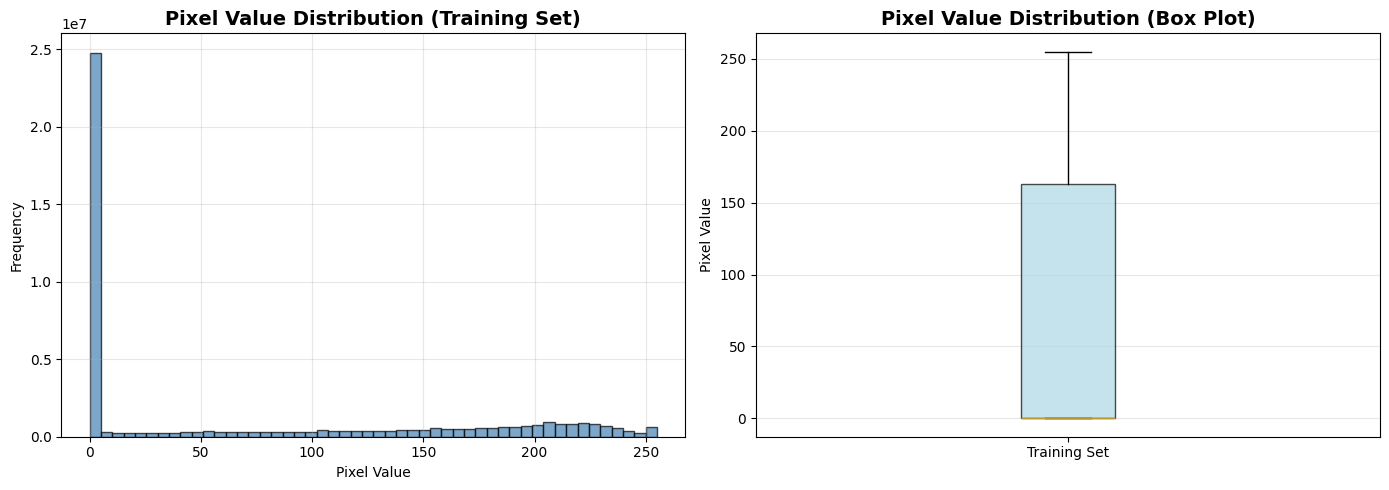


3. CLASS DISTRIBUTION ANALYSIS

📊 Class Distribution (Training Set):
  0. T-shirt/top     :  6000 samples (10.00%)
  1. Trouser         :  6000 samples (10.00%)
  2. Pullover        :  6000 samples (10.00%)
  3. Dress           :  6000 samples (10.00%)
  4. Coat            :  6000 samples (10.00%)
  5. Sandal          :  6000 samples (10.00%)
  6. Shirt           :  6000 samples (10.00%)
  7. Sneaker         :  6000 samples (10.00%)
  8. Bag             :  6000 samples (10.00%)
  9. Ankle boot      :  6000 samples (10.00%)

📊 Class Distribution (Test Set):
  0. T-shirt/top     :  1000 samples (10.00%)
  1. Trouser         :  1000 samples (10.00%)
  2. Pullover        :  1000 samples (10.00%)
  3. Dress           :  1000 samples (10.00%)
  4. Coat            :  1000 samples (10.00%)
  5. Sandal          :  1000 samples (10.00%)
  6. Shirt           :  1000 samples (10.00%)
  7. Sneaker         :  1000 samples (10.00%)
  8. Bag             :  1000 samples (10.00%)
  9. Ankle boot      :

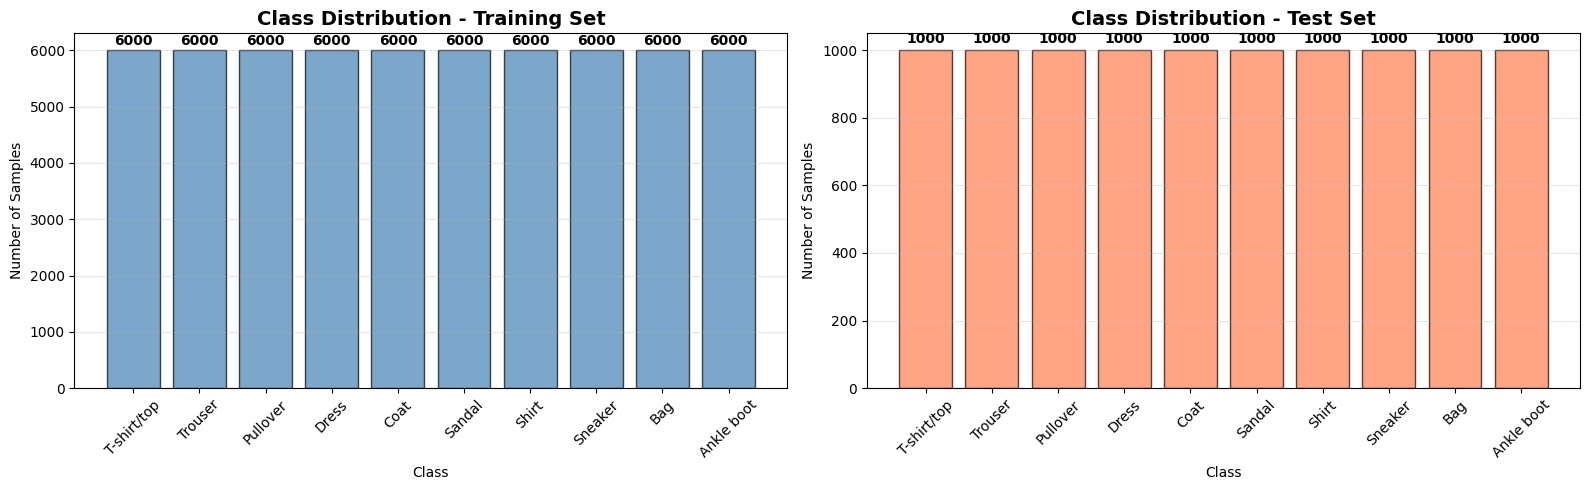


4. SAMPLE VISUALIZATION

Displaying 10 random samples from each class...


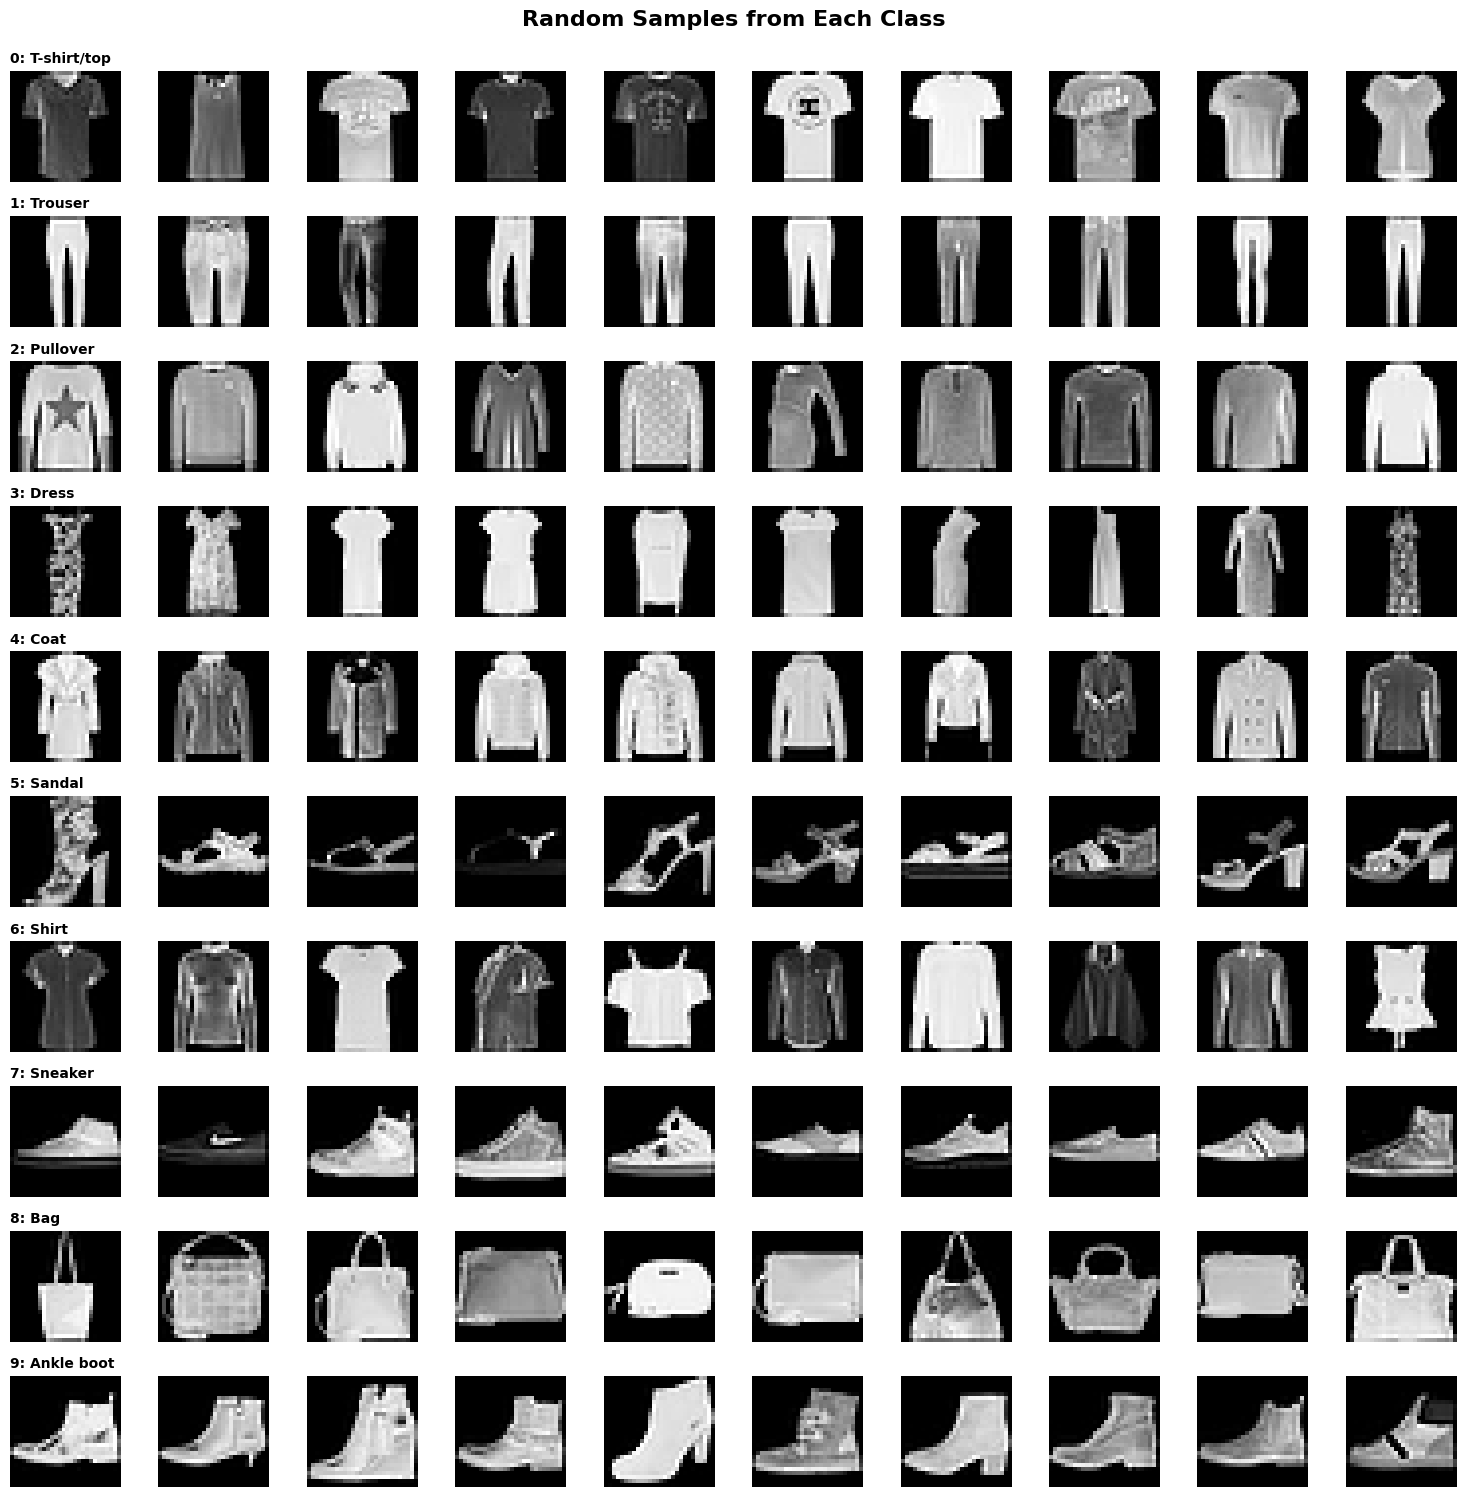


5. IMAGE PROPERTIES ANALYSIS

💡 Brightness Statistics:
  Mean brightness: 72.94
  Min brightness: 4.94
  Max brightness: 191.82
  Std brightness: 32.15

🎨 Contrast Statistics:
  Mean contrast: 81.66
  Min contrast: 16.53
  Max contrast: 121.29
  Std contrast: 20.04

📊 Per-Class Average Brightness and Contrast:
  T-shirt/top    : Brightness=83.03, Contrast=81.61
  Trouser        : Brightness=56.84, Contrast=85.16
  Pullover       : Brightness=96.06, Contrast=82.38
  Dress          : Brightness=66.02, Contrast=85.65
  Coat           : Brightness=98.26, Contrast=90.43
  Sandal         : Brightness=34.87, Contrast=63.27
  Shirt          : Brightness=84.61, Contrast=76.46
  Sneaker        : Brightness=42.76, Contrast=72.66
  Bag            : Brightness=90.16, Contrast=87.23
  Ankle boot     : Brightness=76.81, Contrast=91.80


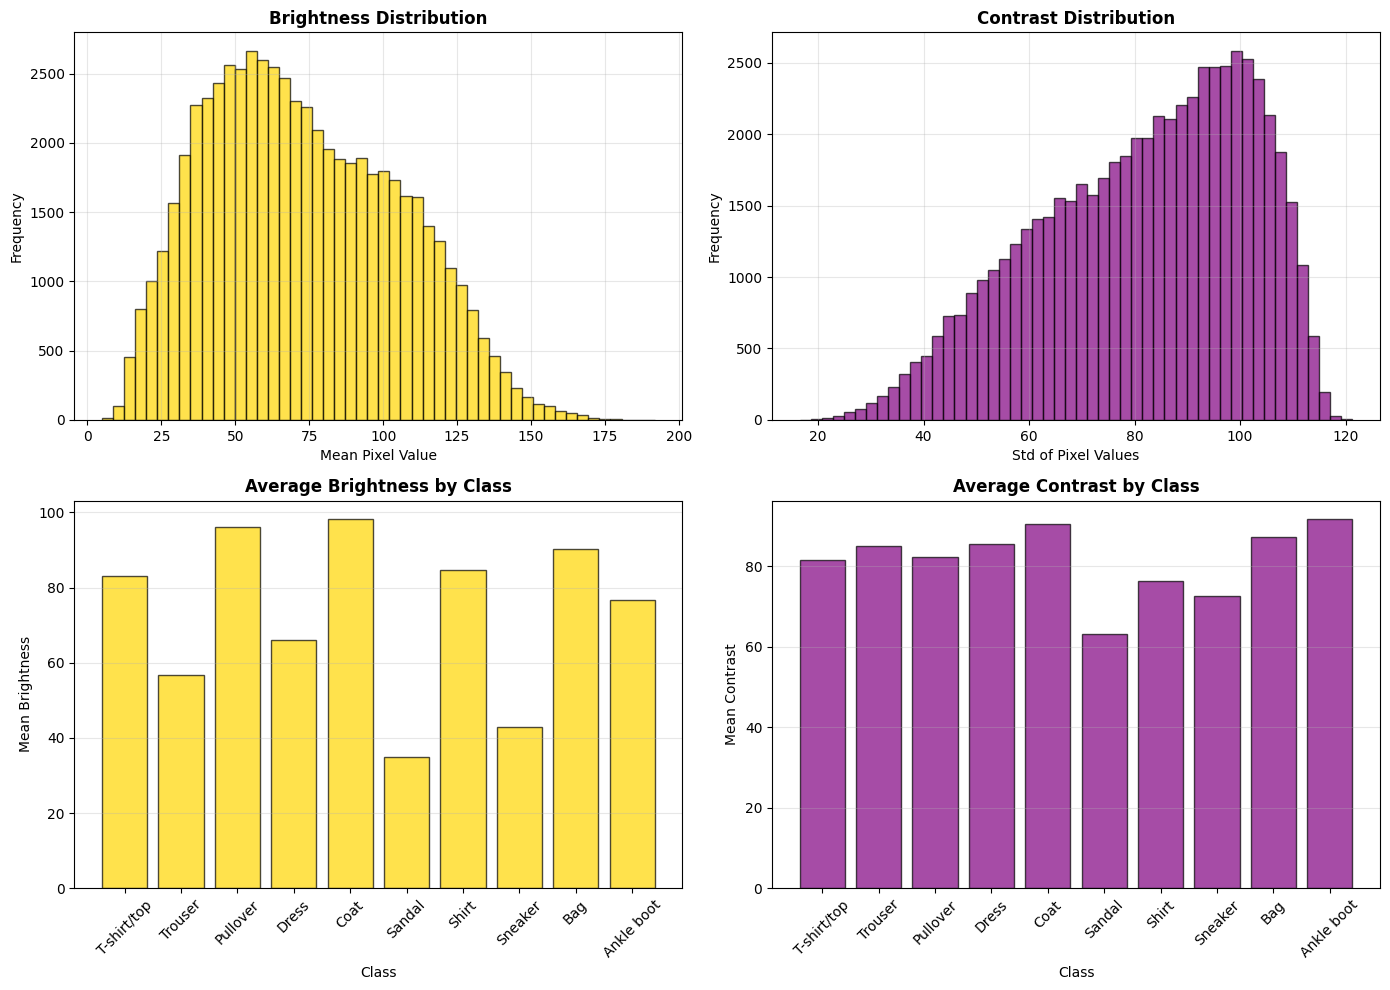


6. CLASS SEPARATION ANALYSIS (PCA)

Performing PCA with 2 components...
(Using subset of 5000 samples for visualization)

📊 PCA Results:
  Explained variance ratio: [0.29448094 0.17558077]
  Cumulative variance explained: 0.4701


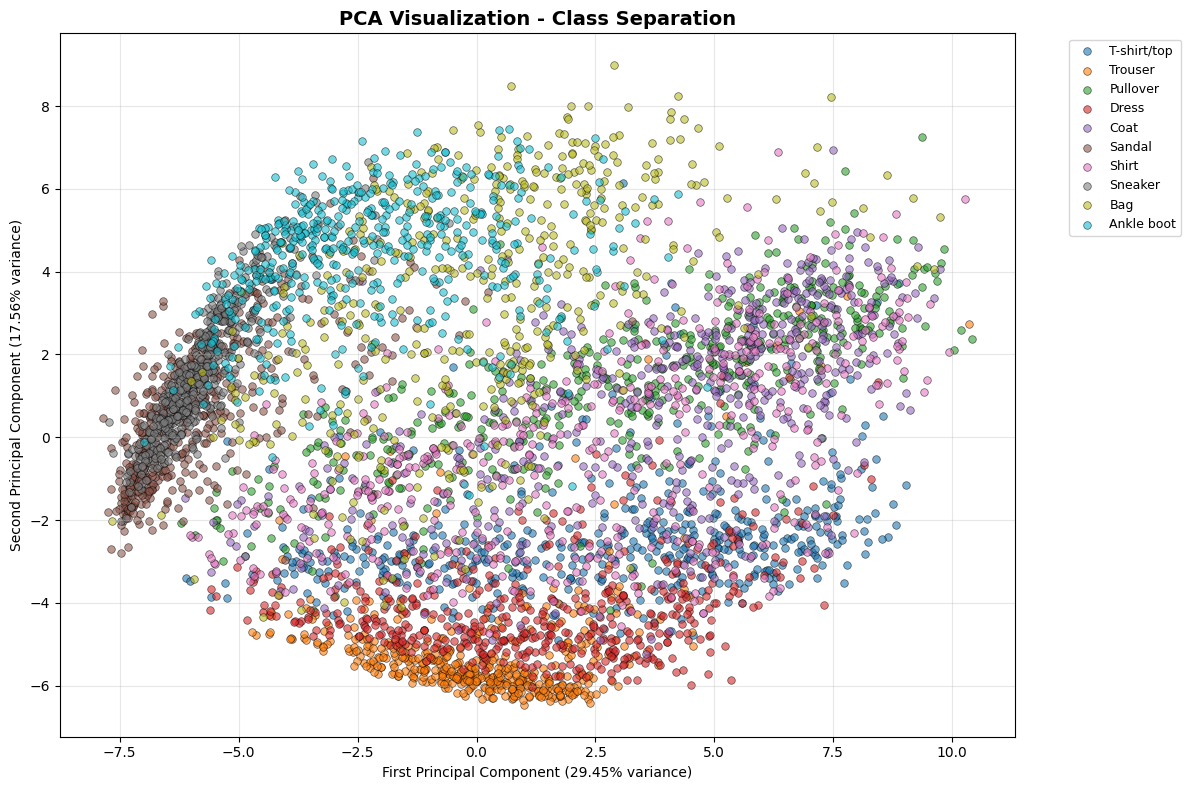


7. AVERAGE IMAGES BY CLASS

Computing average image for each class...


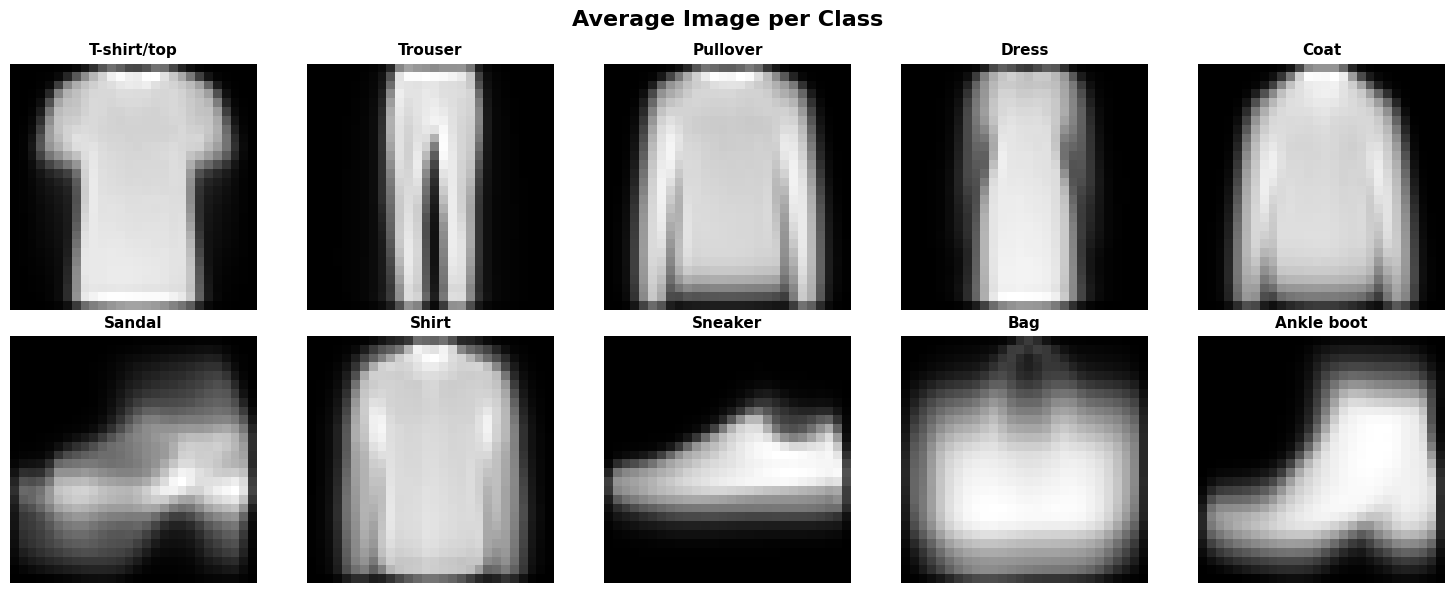


💡 The average images show the typical appearance of each class

8. DATA QUALITY CHECK

🔍 Checking for data quality issues...

  Missing values in training set: 0
  Missing values in test set: 0

  Checking for duplicate images (sample)...
  Duplicates in first 1000 images: 0

  Unique labels in training set: 10
  Unique labels in test set: 10
  Label range: [0, 9]

  Blank images in training set: 0
  Blank images in test set: 0

✓ Data quality check complete!

9. COMPREHENSIVE SUMMARY REPORT

📊 FASHION-MNIST DATASET SUMMARY

DATASET CHARACTERISTICS:
  • Total samples: 70,000
  • Training samples: 60,000
  • Test samples: 10,000
  • Image dimensions: 28×28 pixels (grayscale)
  • Number of classes: 10
  • Data type: uint8

PIXEL STATISTICS:
  • Value range: [0, 255]
  • Mean: 72.94
  • Std deviation: 90.02




In [14]:
# Create EDA object and run complete analysis
eda = FashionMNISTEDA()
eda.run_complete_eda()



💡 Key Takeaways from EDA:
  1. Dataset is well-balanced across all 10 classes
  2. Images are 28×28 grayscale with pixel values 0-255
  3. Normalization to [0,1] range is necessary
  4. Some classes are visually similar (Shirt/T-shirt, Pullover/Coat),The plot shows potential confusion between similar classes.
  5. No data quality issues detected


In [15]:
class DataHandler:
    """Handles data loading, preprocessing, and augmentation with leakage prevention"""

    def __init__(self, validation_split: float = 0.1, random_seed: int = 42):
        self.validation_split = validation_split
        self.random_seed = random_seed
        self.class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
        self.train_mean = None
        self.train_std = None

    def load_data(self) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """Load Fashion-MNIST dataset"""
        (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
        return x_train, y_train, x_test, y_test

    def preprocess_data(self, x_train: np.ndarray, y_train: np.ndarray,
                       x_test: np.ndarray, y_test: np.ndarray,
                       verbose: bool = True) -> Dict[str, np.ndarray]:
        """Normalize and split data with data leakage prevention"""

        np.random.seed(self.random_seed)

        # STEP 1: Split BEFORE preprocessing
        n_samples = len(x_train)
        indices = np.arange(n_samples)
        np.random.shuffle(indices)

        val_size = int(n_samples * self.validation_split)
        val_indices = indices[:val_size]
        train_indices = indices[val_size:]

        x_val = x_train[val_indices].copy()
        y_val = y_train[val_indices].copy()
        x_train_split = x_train[train_indices].copy()
        y_train_split = y_train[train_indices].copy()
        x_test_copy = x_test.copy()
        y_test_copy = y_test.copy()

        if verbose:
            print("\n" + "="*80)
            print("DATA SPLITTING - PREVENTING DATA LEAKAGE")
            print("="*80)
            print(f"Training set: {len(x_train_split)} samples ({(1-self.validation_split)*100:.1f}%)")
            print(f"Validation set: {len(x_val)} samples ({self.validation_split*100:.1f}%)")
            print(f"Test set: {len(x_test_copy)} samples")

        # STEP 2: Convert to float32
        x_train_split = x_train_split.astype('float32')
        x_val = x_val.astype('float32')
        x_test_copy = x_test_copy.astype('float32')

        # STEP 3: Normalize using min-max scaling
        x_train_split = x_train_split / 255.0
        x_val = x_val / 255.0
        x_test_copy = x_test_copy / 255.0

        if verbose:
            print(f"\n✓ Normalization complete: pixel values scaled to [0, 1]")
            print(f"✓ No data leakage: statistics from training set only")

        return {
            'x_train': x_train_split,
            'y_train': y_train_split,
            'x_val': x_val,
            'y_val': y_val,
            'x_test': x_test_copy,
            'y_test': y_test_copy,
            'train_indices': train_indices,
            'val_indices': val_indices
        }

In [16]:
class ModelBuilder:
    """Builds different neural network architectures"""

    @staticmethod
    def build_ann(input_shape: Tuple[int, int], num_classes: int = 10,
                  hidden_layers: list = [128,64], dropout_rate: float = 0.2) -> keras.Model:
        """Build Artificial Neural Network (MLP)"""
        model = models.Sequential([layers.Input(shape=input_shape), layers.Flatten()])


        for units in hidden_layers:
            model.add(layers.Dense(units, activation='relu',
                           kernel_regularizer=keras.regularizers.l2(0.001)))
            model.add(layers.BatchNormalization())
            model.add(layers.Dropout(dropout_rate))

        model.add(layers.Dense(num_classes, activation='softmax'))
        return model

    @staticmethod
    def build_cnn(input_shape: Tuple[int, int], num_classes: int = 10,
                  dropout_rate: float = 0.2) -> keras.Model:

        model = models.Sequential([
            layers.Input(shape=input_shape + (1,)),

            # First conv block
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(dropout_rate),

            # Second conv block
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(dropout_rate),

            # Third conv block
            layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(dropout_rate),

            # Dense layers
            layers.Flatten(),
            layers.Dense(256, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(dropout_rate),
            layers.Dense(num_classes, activation='softmax')
        ])

        return model

In [17]:
class Trainer:
    """Handles model training and evaluation"""

    def __init__(self, model: keras.Model, model_name: str):
        self.model = model
        self.model_name = model_name
        self.history = None

    def compile_model(self, optimizer: str = 'adam', learning_rate: float = 0.0003):

        opt = keras.optimizers.Adam(learning_rate=learning_rate) if optimizer == 'adam' else optimizer



        loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=False)

        self.model.compile(
            optimizer=opt,
            loss=loss_fn,
            metrics=['accuracy']
        )

    def train(self, x_train: np.ndarray, y_train: np.ndarray,
              x_val: np.ndarray, y_val: np.ndarray,
              epochs: int = 30, batch_size: int = 256,
              use_callbacks: bool = True, verbose: int = 1) -> keras.callbacks.History:
        """Train the model"""
        callbacks = []

        if use_callbacks:
            callbacks.append(keras.callbacks.EarlyStopping(
                monitor='val_loss', patience=5, restore_best_weights=True
            ))
            callbacks.append(keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6
            ))

        self.history = self.model.fit(
            x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=callbacks,
            verbose=verbose
        )

        return self.history

    def evaluate(self, x_test: np.ndarray, y_test: np.ndarray) -> Dict[str, float]:
        """Evaluate model"""
        test_loss, test_accuracy = self.model.evaluate(x_test, y_test, verbose=0)
        return {'test_loss': test_loss, 'test_accuracy': test_accuracy}

In [18]:
class Analyzer:
    """Analyzes and visualizes model performance"""

    def __init__(self, class_names: list):
        self.class_names = class_names

    def plot_training_history(self, history: keras.callbacks.History, model_name: str):
        """Plot training and validation accuracy/loss"""
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        axes[0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
        axes[0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
        axes[0].set_title(f'{model_name} - Accuracy', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Accuracy')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)

        axes[1].plot(history.history['loss'], label='Train Loss', linewidth=2)
        axes[1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
        axes[1].set_title(f'{model_name} - Loss', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Loss')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def plot_confusion_matrix(self, model: keras.Model, x_test: np.ndarray,
                             y_test: np.ndarray, model_name: str):
        """Generate and plot confusion matrix"""
        predictions = model.predict(x_test, verbose=0)
        y_pred = np.argmax(predictions, axis=1)
        cm = confusion_matrix(y_test, y_pred)

        plt.figure(figsize=(12, 10))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.class_names,
                   yticklabels=self.class_names)
        plt.title(f'{model_name} - Confusion Matrix', fontsize=16, fontweight='bold')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

        return cm

    def analyze_misclassifications(self, cm: np.ndarray) -> Dict[str, Any]:
        """Analyze confusion matrix"""
        confused_pairs = []

        for i in range(len(cm)):
            for j in range(len(cm)):
                if i != j and cm[i][j] > 0:
                    confused_pairs.append({
                        'true_class': self.class_names[i],
                        'predicted_class': self.class_names[j],
                        'count': int(cm[i][j]),
                        'percentage': float(cm[i][j] / cm[i].sum() * 100)
                    })

        confused_pairs.sort(key=lambda x: x['count'], reverse=True)

        return {
            'top_confusions': confused_pairs[:10],
            'total_misclassifications': int(np.sum(cm) - np.trace(cm))
        }

    def generate_classification_report(self, model: keras.Model,
                                      x_test: np.ndarray, y_test: np.ndarray) -> str:
        """Generate classification report"""
        predictions = model.predict(x_test, verbose=0)
        y_pred = np.argmax(predictions, axis=1)
        return classification_report(y_test, y_pred, target_names=self.class_names)

    def plot_roc_curve(self, model: keras.Model, x_test: np.ndarray,
                       y_test: np.ndarray, model_name: str):
        """Generate and plot ROC curves for each class (one-vs-rest)"""
        from sklearn.preprocessing import label_binarize
        from sklearn.metrics import roc_curve, auc

        print(f"\nGenerating ROC curves for {model_name} (One-vs-Rest)...")

        # Get predicted probabilities
        y_score = model.predict(x_test, verbose=0)

        # Binarize the true labels
        y_test_bin = label_binarize(y_test, classes=range(len(self.class_names)))

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(self.class_names)):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot all ROC curves
        plt.figure(figsize=(10, 8))

        for i in range(len(self.class_names)):
            plt.plot(fpr[i], tpr[i], label=f'{self.class_names[i]} (AUC = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', label='Chance')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)', fontsize=14, fontweight='bold')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.show()

Orchestrates the complete experiment pipeline


In [19]:
class ExperimentRunner:

    def __init__(self, config: Dict[str, Any] = None):
        self.config = config or self.get_default_config()
        self.results = {}
        self.grid_search_results = {}
        self.model_dir = 'saved_models'
        os.makedirs(self.model_dir, exist_ok=True)

    @staticmethod
    def get_default_config() -> Dict[str, Any]:
        return {
            'validation_split': 0.1,
            'epochs': 30,
            'batch_size': 256,
            'learning_rate': 0.0005,
            'optimizer': 'adam',
            'ann_hidden_layers': [ 128,64],
            'dropout_rate': 0.2
        }

    def run_experiment(self, model_type: str = 'both'):
        """Run complete experiment"""
        print("="*80)
        print("Fashion-MNIST Classification Experiment")
        print("="*80)

        data_handler = DataHandler(self.config['validation_split'])
        analyzer = Analyzer(data_handler.class_names)

        print("\nLoading data...")
        x_train, y_train, x_test, y_test = data_handler.load_data()
        data = data_handler.preprocess_data(x_train, y_train, x_test, y_test)

        models_to_train = []
        if model_type in ['ann', 'both']:
            models_to_train.append('ann')
        if model_type in ['cnn', 'both']:
            models_to_train.append('cnn')

        for model_name in models_to_train:
            print(f"\n{'='*80}")
            print(f"Training {model_name.upper()} Model")
            print(f"{'='*80}")

            if model_name == 'ann':
                model = ModelBuilder.build_ann(
                    input_shape=(28, 28),
                    hidden_layers=self.config['ann_hidden_layers'],
                    dropout_rate=self.config['dropout_rate']
                )
                x_train_model = data['x_train']
                x_val_model = data['x_val']
                x_test_model = data['x_test']
            else:
                model = ModelBuilder.build_cnn(
                    input_shape=(28, 28),
                    dropout_rate=self.config['dropout_rate']
                )
                x_train_model = np.expand_dims(data['x_train'], -1)
                x_val_model = np.expand_dims(data['x_val'], -1)
                x_test_model = np.expand_dims(data['x_test'], -1)

            print(f"\n{model_name.upper()} Architecture:")
            model.summary()

            trainer = Trainer(model, model_name)
            trainer.compile_model(
                optimizer=self.config['optimizer'],
                learning_rate=self.config['learning_rate']
            )

            print(f"\nTraining {model_name.upper()}...")
            history = trainer.train(
                x_train_model, data['y_train'],
                x_val_model, data['y_val'],
                epochs=self.config['epochs'],
                batch_size=self.config['batch_size']
            )

            metrics = trainer.evaluate(x_test_model, data['y_test'])

            print(f"\n{model_name.upper()} Results:")
            print(f"  Test Accuracy: {metrics['test_accuracy']:.4f}")
            print(f"  Test Loss: {metrics['test_loss']:.4f}")

            print(f"\nGenerating visualizations...")
            analyzer.plot_training_history(history, model_name.upper())
            cm = analyzer.plot_confusion_matrix(model, x_test_model, data['y_test'], model_name.upper())

            confusion_analysis = analyzer.analyze_misclassifications(cm)
            print(f"\nTop Confused Class Pairs:")
            for pair in confusion_analysis['top_confusions'][:5]:
                print(f"  {pair['true_class']} → {pair['predicted_class']}: {pair['count']} ({pair['percentage']:.2f}%)")

            report = analyzer.generate_classification_report(model, x_test_model, data['y_test'])
            print(f"\nClassification Report:")
            print(report)

            # Plot ROC curves
            analyzer.plot_roc_curve(model, x_test_model, data['y_test'], model_name.upper())

            self.results[model_name] = {
                'model': model,
                'metrics': metrics,
                'history': history.history,
                'confusion_analysis': confusion_analysis
            }

            # Save the trained model
            model_path = os.path.join(self.model_dir, f'{model_name}_model.keras')
            model.save(model_path)
            print(f"\n✓ Model saved to {model_path}")


        if len(models_to_train) == 2:
            self.compare_models()

    def compare_models(self):
        """Compare models"""
        print(f"\n{'='*80}")
        print("Model Comparison")
        print(f"{'='*80}")

        ann_metrics = self.results['ann']['metrics']
        cnn_metrics = self.results['cnn']['metrics']

        print(f"\nTest Accuracy:")
        print(f"  ANN: {ann_metrics['test_accuracy']:.4f}")
        print(f"  CNN: {cnn_metrics['test_accuracy']:.4f}")
        print(f"  Difference: {abs(cnn_metrics['test_accuracy'] - ann_metrics['test_accuracy']):.4f}")
        print(f"  Winner: {'CNN' if cnn_metrics['test_accuracy'] > ann_metrics['test_accuracy'] else 'ANN'}")

        # --- Add visualizations for comparison ---

        # Bar plot for test accuracy
        models = ['ANN', 'CNN']
        accuracies = [ann_metrics['test_accuracy'], cnn_metrics['test_accuracy']]

        plt.figure(figsize=(8, 5))
        bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
        plt.ylabel('Test Accuracy')
        plt.title('Model Test Accuracy Comparison', fontsize=14, fontweight='bold')
        plt.ylim(0.8, 1.0) # Set y-axis limits for better visual comparison
        plt.grid(True, alpha=0.3, axis='y')

        # Add accuracy values on top of bars
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center', fontweight='bold')

        plt.show()

        # Bar plot for test loss
        losses = [ann_metrics['test_loss'], cnn_metrics['test_loss']]

        plt.figure(figsize=(8, 5))
        bars = plt.bar(models, losses, color=['skyblue', 'lightcoral'])
        plt.ylabel('Test Loss')
        plt.title('Model Test Loss Comparison', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3, axis='y')

        # Add loss values on top of bars
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center', fontweight='bold')

        plt.show()

        # --- End of visualizations ---


    def load_model(self, model_name: str):
        """Load a saved model"""
        model_path = os.path.join(self.model_dir, f'{model_name}_model.keras')
        if os.path.exists(model_path):
            print(f"Loading model from {model_path}")
            return keras.models.load_model(model_path)
        else:
            print(f"Model {model_name} not found at {model_path}")
            return None

Evalutation metrices



In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import tensorflow as tf


class Analyzer:
    """Analyzes and visualizes model performance"""

    def __init__(self, class_names: list):
        self.class_names = class_names

    def plot_training_history(self, history: keras.callbacks.History, model_name: str):
        """Plot training and validation accuracy/loss"""
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        axes[0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
        axes[0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
        axes[0].set_title(f'{model_name} - Accuracy', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Accuracy')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)

        axes[1].plot(history.history['loss'], label='Train Loss', linewidth=2)
        axes[1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
        axes[1].set_title(f'{model_name} - Loss', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Loss')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def plot_confusion_matrix(self, model: keras.Model, x_test: np.ndarray,
                             y_test: np.ndarray, model_name: str):
        """Generate and plot confusion matrix"""
        predictions = model.predict(x_test, verbose=0)
        y_pred = np.argmax(predictions, axis=1)
        cm = confusion_matrix(y_test, y_pred)

        plt.figure(figsize=(12, 10))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.class_names,
                   yticklabels=self.class_names)
        plt.title(f'{model_name} - Confusion Matrix', fontsize=16, fontweight='bold')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

        return cm

    def analyze_misclassifications(self, cm: np.ndarray) -> Dict[str, Any]:
        """Analyze confusion matrix"""
        confused_pairs = []

        for i in range(len(cm)):
            for j in range(len(cm)):
                if i != j and cm[i][j] > 0:
                    confused_pairs.append({
                        'true_class': self.class_names[i],
                        'predicted_class': self.class_names[j],
                        'count': int(cm[i][j]),
                        'percentage': float(cm[i][j] / cm[i].sum() * 100)
                    })

        confused_pairs.sort(key=lambda x: x['count'], reverse=True)

        return {
            'top_confusions': confused_pairs[:10],
            'total_misclassifications': int(np.sum(cm) - np.trace(cm))
        }

    def generate_classification_report(self, model: keras.Model,
                                      x_test: np.ndarray, y_test: np.ndarray) -> str:
        """Generate classification report"""
        predictions = model.predict(x_test, verbose=0)
        y_pred = np.argmax(predictions, axis=1)
        return classification_report(y_test, y_pred, target_names=self.class_names)

    def plot_roc_curve(self, model: keras.Model, x_test: np.ndarray,
                       y_test: np.ndarray, model_name: str):
        """Generate and plot ROC curves for each class (one-vs-rest)"""


        print(f"\nGenerating ROC curves for {model_name} (One-vs-Rest)...")

        # Get predicted probabilities
        y_score = model.predict(x_test, verbose=0)

        # Binarize the true labels
        y_test_bin = label_binarize(y_test, classes=range(len(self.class_names)))

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(self.class_names)):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot all ROC curves
        plt.figure(figsize=(10, 8))

        for i in range(len(self.class_names)):
            plt.plot(fpr[i], tpr[i], label=f'{self.class_names[i]} (AUC = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', label='Chance')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)', fontsize=14, fontweight='bold')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.show()


Additional Analysis
Fashion-MNIST Classification Experiment

Loading data...

DATA SPLITTING - PREVENTING DATA LEAKAGE
Training set: 54000 samples (90.0%)
Validation set: 6000 samples (10.0%)
Test set: 10000 samples

✓ Normalization complete: pixel values scaled to [0, 1]
✓ No data leakage: statistics from training set only

Training ANN Model

ANN Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)


Training ANN...
Epoch 1/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.6610 - loss: 1.3134 - val_accuracy: 0.8263 - val_loss: 0.8433 - learning_rate: 5.0000e-04
Epoch 2/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8264 - loss: 0.7477 - val_accuracy: 0.8480 - val_loss: 0.6598 - learning_rate: 5.0000e-04
Epoch 3/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8470 - loss: 0.6563 - val_accuracy: 0.8587 - val_loss: 0.5938 - learning_rate: 5.0000e-04
Epoch 4/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8567 - loss: 0.6012 - val_accuracy: 0.8638 - val_loss: 0.5558 - learning_rate: 5.0000e-04
Epoch 5/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8640 - loss: 0.5570 - val_accuracy: 0.8677 - val_loss: 0.5245 - learning_rate: 5.0000e-04
Epoch 6/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8720 - loss: 0.5186 - val_accuracy: 0.8697 - val_loss: 0.5040 - learning_rate: 5.0000e-04
Epoch 7/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms

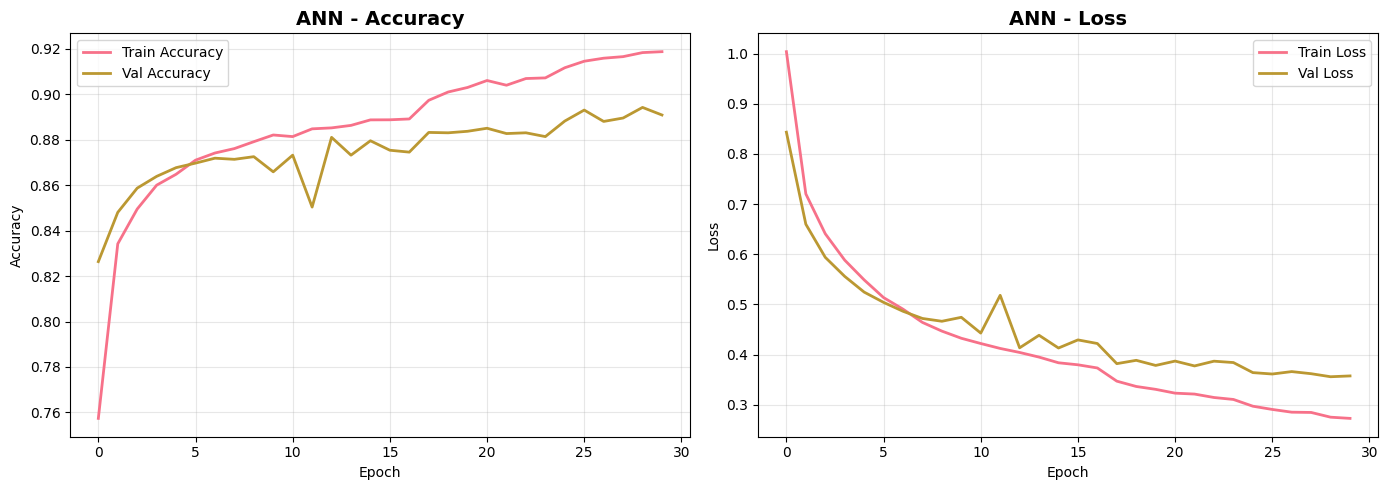

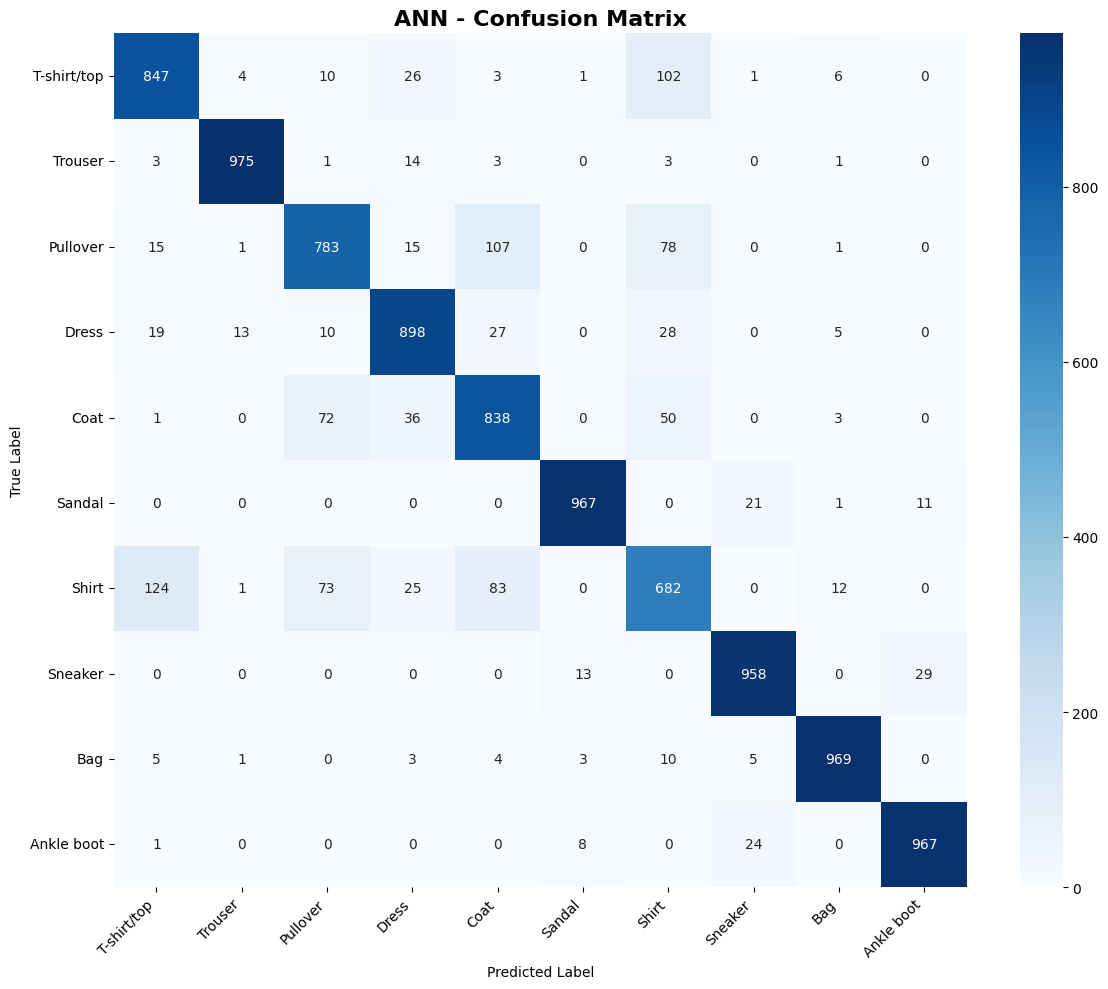


Top Confused Class Pairs:
  Shirt → T-shirt/top: 124 (12.40%)
  Pullover → Coat: 107 (10.70%)
  T-shirt/top → Shirt: 102 (10.20%)
  Shirt → Coat: 83 (8.30%)
  Pullover → Shirt: 78 (7.80%)

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.85      0.84      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.83      0.78      0.80      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.79      0.84      0.81      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.72      0.68      0.70      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Generating ROC curves for A

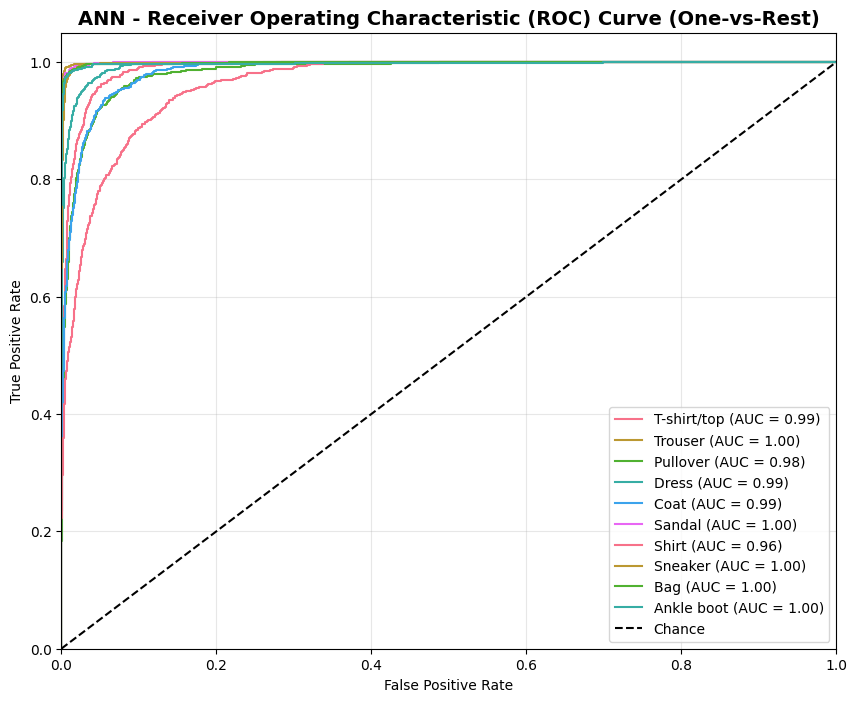


✓ Model saved to saved_models/ann_model.keras

Training CNN Model

CNN Architecture:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 438,890 (1.67 MB)

 Trainable params: 437,738 (1.67 MB)

 Non-trainable params: 1,152 (4.50 KB)


Training CNN...
Epoch 1/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.7018 - loss: 0.8708 - val_accuracy: 0.1715 - val_loss: 3.0345 - learning_rate: 5.0000e-04
Epoch 2/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.8557 - loss: 0.3905 - val_accuracy: 0.5495 - val_loss: 1.6869 - learning_rate: 5.0000e-04
Epoch 3/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8792 - loss: 0.3295 - val_accuracy: 0.8602 - val_loss: 0.3680 - learning_rate: 5.0000e-04
Epoch 4/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8950 - loss: 0.2877 - val_accuracy: 0.9102 - val_loss: 0.2458 - learning_rate: 5.0000e-04
Epoch 5/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9046 - loss: 0.2623 - val_accuracy: 0.9155 - val_loss: 0.2258 - learning_rate: 5.0000e-04
Epoch 6/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9114 - loss: 0.2400 - val_accuracy: 0.9178 - val_loss: 0.2175 - learning_rate: 5.0000e-04
Epoch 7/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 

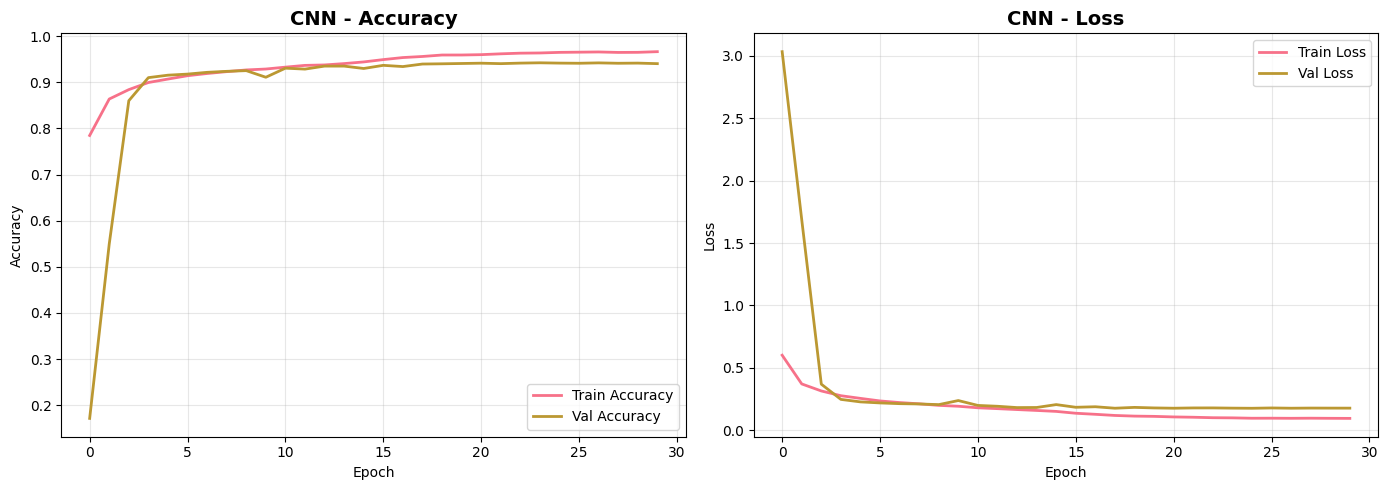

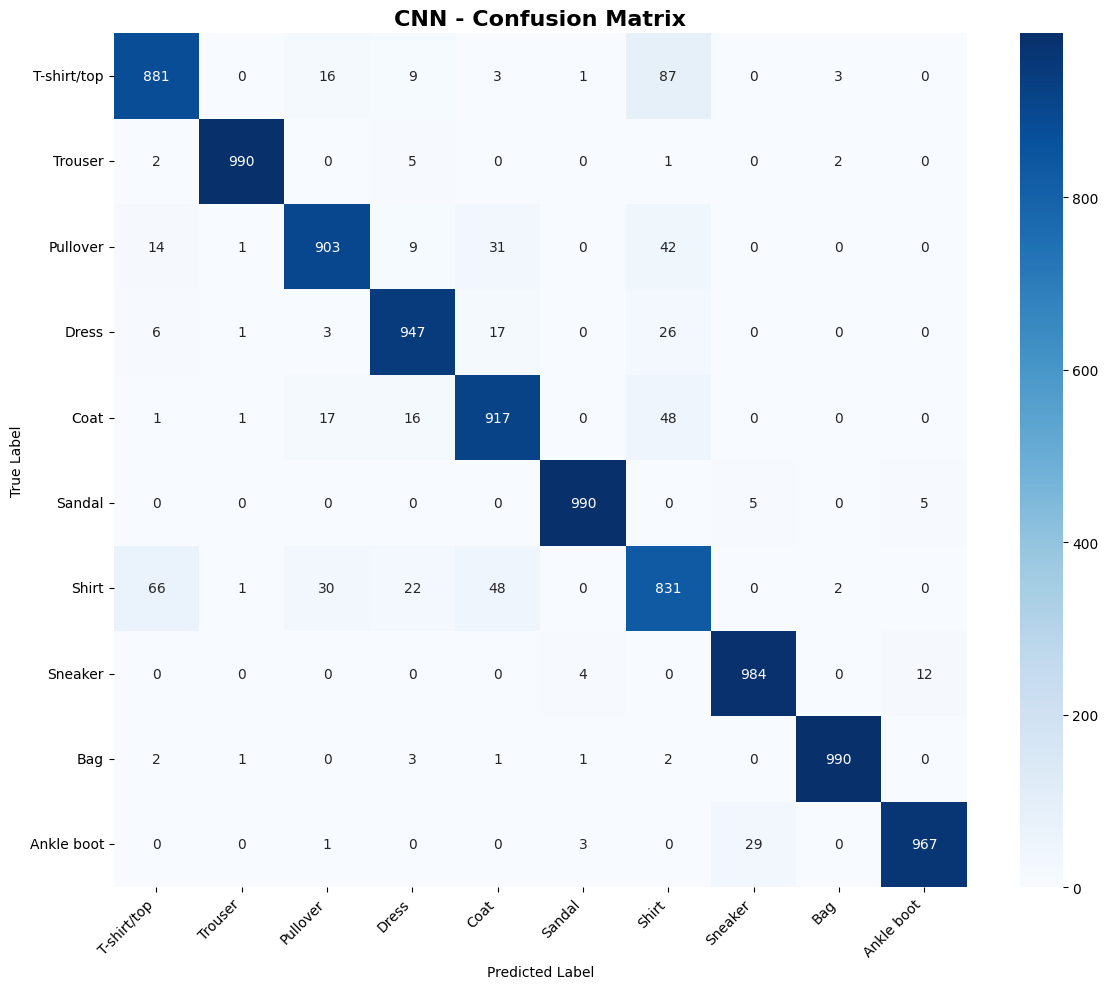


Top Confused Class Pairs:
  T-shirt/top → Shirt: 87 (8.70%)
  Shirt → T-shirt/top: 66 (6.60%)
  Coat → Shirt: 48 (4.80%)
  Shirt → Coat: 48 (4.80%)
  Pullover → Shirt: 42 (4.20%)

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.91      0.88      0.89      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.93      0.90      0.92      1000
       Dress       0.94      0.95      0.94      1000
        Coat       0.90      0.92      0.91      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.80      0.83      0.82      1000
     Sneaker       0.97      0.98      0.98      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000


Generating ROC curves for CNN (One-v

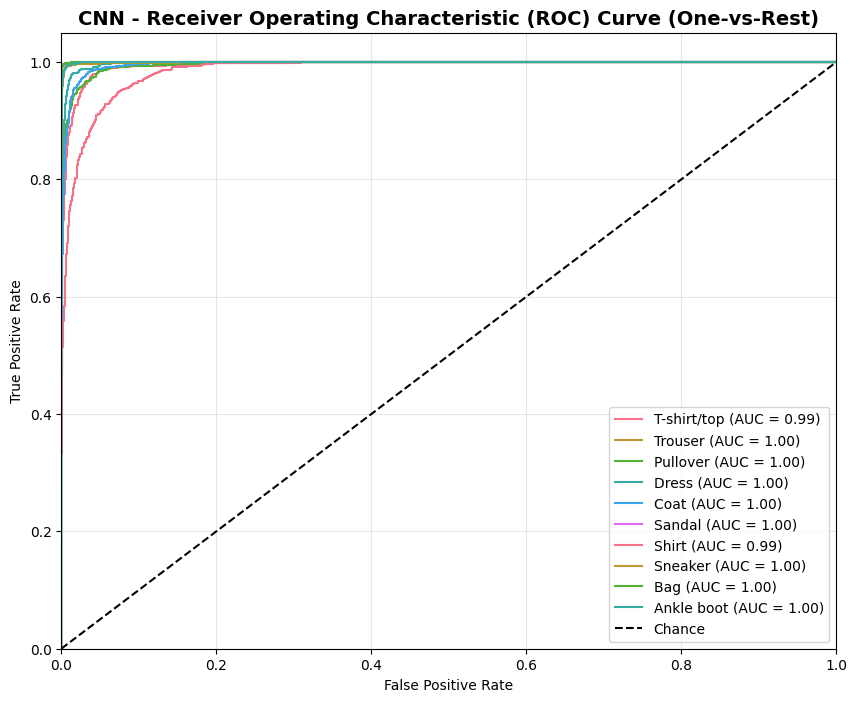


✓ Model saved to saved_models/cnn_model.keras

Model Comparison

Test Accuracy:
  ANN: 0.8884
  CNN: 0.9400
  Difference: 0.0516
  Winner: CNN


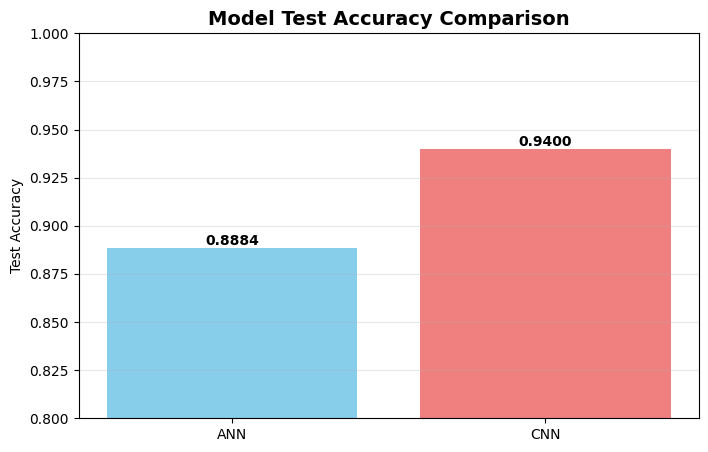

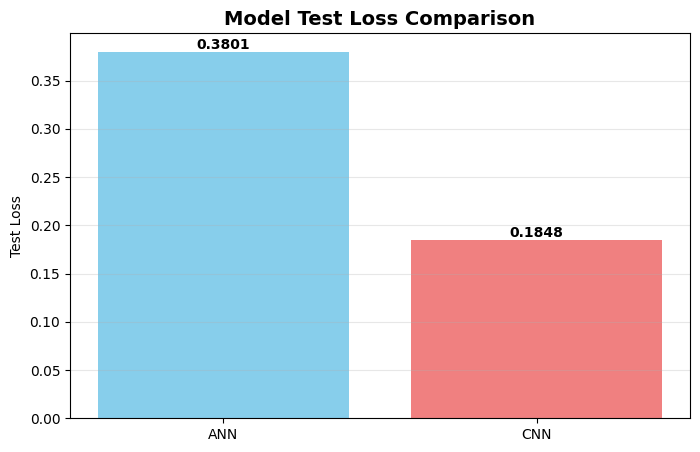


Final Comparison:
ANN: 0.8884
CNN: 0.9400
CNN Improvement: 5.81%


In [21]:
print("\n" + "="*80)
print("Additional Analysis")
print("="*80)

# Compare both models
runner_full = ExperimentRunner()
runner_full.run_experiment(model_type='both')

# Access results
ann_accuracy = runner_full.results['ann']['metrics']['test_accuracy']
cnn_accuracy = runner_full.results['cnn']['metrics']['test_accuracy']

print(f"\nFinal Comparison:")
print(f"ANN: {ann_accuracy:.4f}")
print(f"CNN: {cnn_accuracy:.4f}")
print(f"CNN Improvement: {((cnn_accuracy - ann_accuracy) / ann_accuracy * 100):.2f}%")

## Inference Pipeline

This section demonstrates how to load a trained model and use it to make predictions on uploaded image. You can choose between the ANN and CNN models trained in the previous steps.

In [22]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
import io # Import the io module
import tensorflow as tf # Import tensorflow for tf.function
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import matplotlib
# from .agent_code.analyzer import Analyzer # Import the Analyzer class - Removed

def run_interactive_inference():
    """Runs interactive inference using a loaded model and image upload"""
    print(f"\n{'='*80}")
    print(f"Interactive Inference")
    print(f"{'='*80}")

    # Load data handler for class names and preprocessing
    data_handler = DataHandler()
    class_names = data_handler.class_names
    analyzer = Analyzer(class_names) # Instantiate the Analyzer

    # Model selection widget
    model_dropdown = widgets.Dropdown(
        options=['cnn', 'ann'],
        value='cnn',
        description='Choose Model:',
        disabled=False,
    )

    # File upload widget
    upload_widget = widgets.FileUpload(
        accept='image/*',
        multiple=False,
        description='Upload Image:',
    )

    # Output widget for results
    output_widget = widgets.Output()

    # Define the prediction step as a tf.function
    @tf.function
    def predict_image(model, image_array):
        return model(image_array)


    def on_upload_change(change):
        with output_widget:
            clear_output()
            # Check if the value dictionary is not empty
            if upload_widget.value and len(upload_widget.value) > 0:
                # Access the filename (key) and file content (value dictionary)
                uploaded_filename = list(upload_widget.value.keys())[0]
                uploaded_file_info = list(upload_widget.value.values())[0]

                print(f"Uploaded: {uploaded_filename}")

                try:
                    # Load and preprocess image from binary content
                    img = Image.open(io.BytesIO(uploaded_file_info['content'])).convert('L') # Use io.BytesIO
                    img = img.resize((28, 28)) # Resize to 28x28
                    img_array = np.array(img)

                    # Normalize like training data
                    img_array_normalized = img_array.astype('float32') / 255.0

                    # Load the selected model
                    runner = ExperimentRunner()
                    selected_model_name = model_dropdown.value
                    model = runner.load_model(selected_model_name)

                    if model is None:
                        print(f"Error: Could not load {selected_model_name} model.")
                        return

                    # Reshape image for model and convert to tensor
                    if selected_model_name == 'cnn':
                        img_array_model_input = np.expand_dims(img_array_normalized, -1)
                    else:
                        img_array_model_input = img_array_normalized
                    img_tensor = tf.convert_to_tensor(np.expand_dims(img_array_model_input, 0)) # Convert to tensor and add batch dimension


                    # Make prediction using the tf.function
                    print("\nMaking prediction...")
                    predictions = predict_image(model, img_tensor).numpy() # Use the tf.function and convert back to numpy

                    predicted_class_index = np.argmax(predictions, axis=1)[0]
                    predicted_class_name = class_names[predicted_class_index]
                    confidence = predictions[0][predicted_class_index]

                    print(f"\nPrediction: {predicted_class_name}")
                    print(f"Confidence: {confidence:.4f}")

                    # Display the uploaded image
                    plt.figure(figsize=(3, 3))
                    plt.imshow(img, cmap='gray')
                    plt.title(f"Predicted: {predicted_class_name}")
                    plt.axis('off')
                    plt.show()



                except Exception as e:
                    print(f"Error processing image or making prediction: {e}")
            else:
                print("No file uploaded or upload canceled.")


    upload_widget.observe(on_upload_change, names='value')

    display(model_dropdown, upload_widget, output_widget)

# Run the interactive inference
run_interactive_inference()


Interactive Inference


Dropdown(description='Choose Model:', options=('cnn', 'ann'), value='cnn')

FileUpload(value={}, accept='image/*', description='Upload Image:')

Output()